In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import b_value_functions1 as b_value_functions # these are the functions in the .py file 
from datetime import datetime
import statistics

In [2]:
bposCT = pd.read_csv(r"D:\Yihe\Basel Shell\bpos.csv")
#print(bposCT)
bpos = np.array(bposCT)
#print(bpos)

In [3]:
dtrCT = pd.read_csv(r"D:\Yihe\Basel Shell\date.csv")
#print(dtrCT)
dtr = dtrCT.applymap(pd.to_datetime)
dtr = np.array(dtr)
#print(dtr)

In [4]:
print(type(dtr[0][0]))

<class 'numpy.datetime64'>


In [4]:
stdCT = pd.read_csv(r"D:\Yihe\Basel Shell\std.csv")
#print(stdCT)
std = np.array(stdCT)
#print(std)

In [5]:
rDmaxCT = pd.read_csv(r"D:\Yihe\Basel Shell\rDmax.csv")
#print(rDmaxCT)
rDmax = np.array(rDmaxCT)
#print(rDmax)

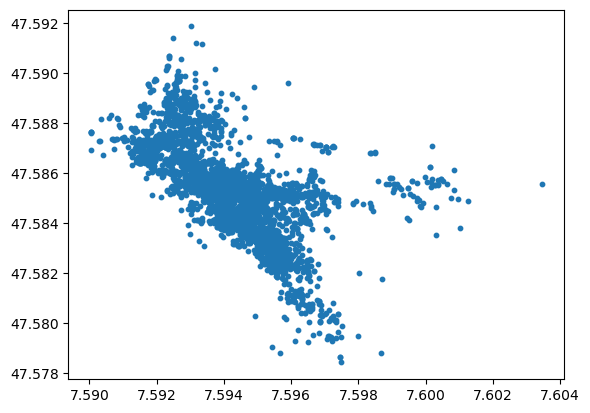

5.722905092592555
159706 221160


In [6]:
catalogT = pd.read_csv("D:\Yihe\Louis_CorinthData\OtherEQCatalogs\BALE_2019Better_6000events_induced\Basel 2006-2018 Herrman Supplement.csv")
catalog1 = pd.read_csv("D:\Yihe\Louis_CorinthData\OtherEQCatalogs\BALE_2019Better_6000events_induced\Basel TPID.csv")

# convert xyz to int, lat/lon to float, and cut TPID
X=[]
Y=[]
Z=[]
lat=[]
lon=[]
dep=[]
tpid=[]
Mw=[]
DT=[]

for x in range(len(catalog1["SourceDateTime"])):
    if catalog1["X"][x]!="---" and catalog1["Y"][x]!="---" and catalog1["Z"][x]!="---":
        X.append(int(catalog1["X"][x]))
        Y.append(int(catalog1["Y"][x]))
        Z.append(int(catalog1["Z"][x]))
        lat.append(float(catalog1["Lat"][x]))
        lon.append(float(catalog1["Lon"][x]))
        dep.append(float(catalog1["Dep"][x]))
        if catalog1["Mwx"][x]!="-.--":
            Mw.append(float(catalog1["Mwx"][x]))
        else:
            Mw.append(-10.0)
        temp=catalog1["TpID"][x].split('p')
        if temp[0]=="------":
            tpid.append(0)
        else:
            tpid.append(int(temp[1]))
        dtTemp = catalog1["SourceDateTime"][x].split('T')
        dTemp = dtTemp[0].split('-')
        ttemp = dtTemp[1].split(':')
        DT.append(datetime(int(dTemp[0]),int(dTemp[1]),int(dTemp[2]),int(ttemp[0]),int(ttemp[1]),int(float(ttemp[2]))))
    
#print(tpid)

plt.scatter(lon,lat,s=10)
plt.show()

# Create a radius from well-head
R=np.sqrt(np.square(X)+np.square(Y)+np.square(Z))

# create tpref which is a referential array where tpref[num] gives the index of that num in the locational dataset
tpref=[0]*2509

for x in range(len(tpid)):
    tpref[tpid[x]]=x
    
hsLat=[]
hsLon=[]
hsDep=[]
hX=[]
hY=[]
hZ=[]
hDT=[]
hsMw=[]

#len(catalog["CCC"]
for x in range(len(catalogT["CCC"])):
    if float(catalogT["CCC"][x])>=0.5:
        sDate=catalogT["Date"][x].split('-')
        sTime=catalogT["Time"][x].split(':')
        hDT.append(datetime(int(sDate[0]),int(sDate[1]),int(sDate[2]),int(sTime[0]),int(sTime[1]),int(float(sTime[2]))))
        #print(tpref[catalog["TpID"][x]],x)
        hsLat.append(lat[tpref[catalogT["TpID"][x]]])
        hsLon.append(lon[tpref[catalogT["TpID"][x]]])
        hsDep.append(dep[tpref[catalogT["TpID"][x]]])
        hX.append(X[tpref[catalogT["TpID"][x]]])
        hY.append(Y[tpref[catalogT["TpID"][x]]])
        hZ.append(Z[tpref[catalogT["TpID"][x]]])
        hsMw.append(catalogT["Mwx"][x])
        
hR=np.sqrt(np.square(hX)+np.square(hY)+np.square(hZ))

# Inj St  grndTST? datetime(2006,12,2,17,12)
# Inj End 12.95616898148148 2006-12-08 10:32:59

injSt = datetime(2006,12,2,17,12).timestamp()/86400.0
injEnd = datetime(2006,12,8,10,32,59).timestamp()/86400.0 - injSt
print(injEnd)

dt = [x.timestamp()/86400.0 - injSt for x in hDT]

# Filters all arrays according to injection start and end dates, chatgpt assisted
dtF, magF, xf, yf, depf,  = zip(*[
    (d, m, x, y, dp)
    for d, m, x, y, dp in zip(dt, hsMw, hX, hY, hZ)
    if injSt-injSt <= d <= injEnd and m>=-9
])
print(len(magF),len(dt))

In [7]:
import statistics
xref = statistics.median(xf[0:10])
yref = statistics.median(yf[0:10])
zref = statistics.median(depf[0:10])
print(xref,yref,zref)

hR=np.sqrt((np.array(xf)-xref)**2+(np.array(yf)-yref)**2+(np.array(depf)-zref)**2)
print(len(hsMw))

-8.0 -54.0 -63.0
221160


In [9]:
def quicksort_with_swaps(arr1, arr2, low, high):
    if low < high:

        pivot_index = partition(arr1, arr2, low, high)
s
        quicksort_with_swaps(arr1, arr2, low, pivot_index)
        quicksort_with_swaps(arr1, arr2, pivot_index + 1, high)

def partition(arr1, arr2, low, high):

    pivot = arr1[(low + high) // 2]
    i = low - 1
    j = high + 1

    while True:
        i += 1
        while arr1[i] < pivot:
            i += 1

        j -= 1
        while arr1[j] > pivot:
            j -= 1

        if i >= j:
            return j

        arr1[i], arr1[j] = arr1[j], arr1[i]
        arr2[i], arr2[j] = arr2[j], arr2[i]



def quicksort(arr):
    if len(arr) <= 1:
        return arr
    
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    
    return quicksort(left) + middle + quicksort(right)

Sorted array1: [1, 1, 2, 3, 4, 5, 6, 9]
Corresponding sorted array2: ['a', 'a', 'b', 'c', 'd', 'e', 'f', 'i']


In [10]:
dist = hR.copy()

In [11]:
numfig=0
def mfDisp(marr,dat,ring):
    bins = np.arange(-2, 6, 0.1)
    bv, Mc, hist = b_value_functions.btrad(mxT, bins, delta_b = 0.01)
    histp, bp = b_value_functions.bpos(mxT)
    x = bins
    y_Mc = hist[0][np.argmax(hist[0])+2]
    a = np.log10(y_Mc) + bv*Mc
    best_fit = 10**(a-bv*x)
    mid_bins = (bins[:-1] + bins[1:])/2
    # Plot results 
    figure = plt.figure(figsize = [6,4])
    ax1 = figure.add_subplot(111)
    ax1.scatter(mid_bins, hist[0], marker = '.')
    ax1.plot(x, best_fit, label = 'b-value = '+str(np.round(bv,2)))
    ax1.set_xlim([-2, 3])
    ax1.set_ylim([10**-1, 10**4])
    ax1.set_yscale('log')
    ax1.legend(loc = 'upper right')
    ax1.set_xlabel('Magnitude')
    ax1.set_ylabel('Count')
    ax1.set_title('MFD '+dat.isoformat()+" ring" + str(ring))
    plt.savefig("MFD "+str(ring)+" "+dat.strftime("%y%m%d%h%m")+" "+str(numfig)+".png")
    plt.close(figure)

In [13]:
hRC = hR.copy()
hRref=[]
for i in range(len(hRC)):
    hRref.append(i)
quicksort_with_swaps(hRC,hRref , 0, len(hRC) - 1)

rDivs=[[] for i in range(12)]
rDmaxRad=[]
count=0
rpl=0
for i in range(len(hRC)):
    if count <13309:
        rDivs[rpl].append(hRref[i])
        count +=1
    if count ==13309:
        count = 0
        rpl+=1
        rDmaxRad.append(hRC[i])
print(rDmaxRad)
# bin stuff
bins = np.arange(-2, 6, 0.1)
mid_bins = (bins[:-1] + bins[1:])/2

sDivs=[[] for i in range(12)]
for i in range(12):
    sDivs[i]=quicksort(rDivs[i])

[74.92663077971676, 111.46748404803976, 137.8985134075056, 169.82932608945958, 194.89997434581667, 224.13611935607344, 249.86596406873826, 284.4942881676186, 322.2483514310042, 369.1043212968388, 418.17101764708656]


In [19]:
br=[[] for i in range(12)]
bpr=[[] for i in range(12)]
dtr=[[] for i in range(12)]
lbr=[[] for i in range(12)]
hbr=[[] for i in range(12)]
stdr=[[] for i in range(12)]
lbpr=[[] for i in range(12)]
hbpr=[[] for i in range(12)]
stdpr=[[] for i in range(12)]
mxmr=[[] for i in range(12)]
mxdr=[[] for i in range(12)]

hsMw = np.array(magF)
hDT = np.array(dtF)

for i in range(12):
    print(i)
    t1 = True
    t2 = True
    t3 = True
    for x in range(1000,len(sDivs[i]),100):
        mxt =[]
        mxm=-10
        md=0
        for j in range(x-1000,x):
            mxt.append(hsMw[sDivs[i][j]])
            if mxt[-1]>mxm:
                mxm=mxt[-1]
                md=hDT[sDivs[i][j]]
        mxT=np.array(mxt)
        mxmr[i].append(mxm)
        mxdr[i].append(md)
        b, Mc, hist = b_value_functions.btrad(mxT, bins, delta_b = 0.01)
        hist1, bP = b_value_functions.bpos(mxT)
        low_b, high_b, std = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.00001)    
        low_bp, high_bp, stdp = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.00001)
        br[i].append(b)
        dtr[i].append(hDT[sDivs[i][x]])
        bpr[i].append(bP)
        lbr[i].append(low_b)
        lbpr[i].append(low_bp)
        hbr[i].append(high_b)
        hbpr[i].append(high_bp)
        stdr[i].append(std)
        stdpr[i].append(stdp)
        
        

0
1
2
3
4
5
6
7
8
9
10
11


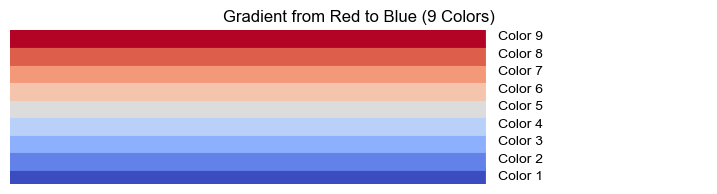

In [20]:
# Generate a color gradient from red to blue
cmap = plt.get_cmap('coolwarm')  # This colormap transitions from red to blue

# Create 9 distinct colors from the gradient
colors = [cmap(i / 8) for i in range(9)]

# Display the colors
plt.figure(figsize=(9, 2))
for i, color in enumerate(colors):
    plt.plot([0, 1], [i, i], color=color, linewidth=15)
    plt.text(1.05, i, f"Color {i+1}", va='center')

plt.xlim(0, 1.5)
plt.axis('off')
plt.title('Gradient from Red to Blue (9 Colors)')
plt.show()
colors.reverse()
colors2=colors.copy()

In [9]:
from datetime import timedelta
print(type(dtr[0][0]))
print(type(timedelta(hours=1)))

<class 'numpy.datetime64'>
<class 'datetime.timedelta'>


In [10]:
stDat= datetime(2006,11,25,11,36,6)
dtrNew = []
for i in range(len(dtr)):
    dtrNew.append([(datetime.utcfromtimestamp(dt.astype('datetime64[s]').astype(int))-stDat).total_seconds()/86400.0 for dt in dtr[i]])
# 2006-11-25 11:36:06 start date
#print(dtrNew)

[[7.7313425925925925, 7.755520833333334, 7.773206018518518, 7.79724537037037, 7.824224537037037, 7.848217592592593, 7.8657407407407405, 7.892314814814815, 7.9159143518518515, 7.946944444444444, 8.001643518518518, 8.032488425925926, 8.043333333333333, 8.055081018518518, 8.064618055555556, 8.07451388888889, 8.087141203703704, 8.1009375, 8.111238425925926, 8.124375, 8.137488425925927, 8.151828703703703, 8.163472222222222, 8.173935185185185, 8.183113425925926, 8.195266203703703, 8.207210648148148, 8.219895833333334, 8.231701388888888, 8.246770833333333, 8.260416666666666, 8.277465277777777, 8.290810185185185, 8.305810185185186, 8.323831018518518, 8.346469907407407, 8.367685185185184, 8.3853125, 8.405104166666666, 8.4209375, 8.442395833333334, 8.463356481481481, 8.484074074074075, 8.503541666666667, 8.5228125, 8.542754629629629, 8.560821759259259, 8.576157407407408, 8.598217592592592, 8.617175925925926, 8.63804398148148, 8.658032407407408, 8.681493055555556, 8.701493055555556, 8.72465277777

In [11]:
print(type(dtr[0][0]))
print(type(stDat))

<class 'numpy.datetime64'>
<class 'datetime.datetime'>


In [21]:
print(dtr[-1])

[2.6165046296300716, 2.7497800925939373, 2.8701388888894144, 2.956712962963138, 3.030694444445544, 3.0852199074088276, 3.1401157407417486, 3.1905439814818237, 3.244074074074888, 3.2819560185198497, 3.3301273148153996, 3.37409722222219, 3.4149189814816054, 3.449050925926713, 3.482245370370947, 3.526574074074233, 3.561076388888978, 3.5928935185183946, 3.628634259259343, 3.665393518518613, 3.712187500001164, 3.7576273148151813, 3.8070370370369346, 3.853379629630581, 3.897673611112623, 3.9503935185184673, 3.991319444445253, 4.030300925925985, 4.074398148148248, 4.106712962964593, 4.141099537037007, 4.178900462964521, 4.21665509259401, 4.255381944445617, 4.287638888888978, 4.310925925927222, 4.3450231481492665, 4.375335648148393, 4.406689814815763, 4.43069444444518, 4.464675925926713, 4.497511574074451, 4.53225694444518, 4.567650462964593, 4.59946759259401, 4.625138888890433, 4.650636574075179, 4.6761458333348855, 4.700763888889924, 4.725474537037371, 4.751365740741676, 4.770590277777956, 4

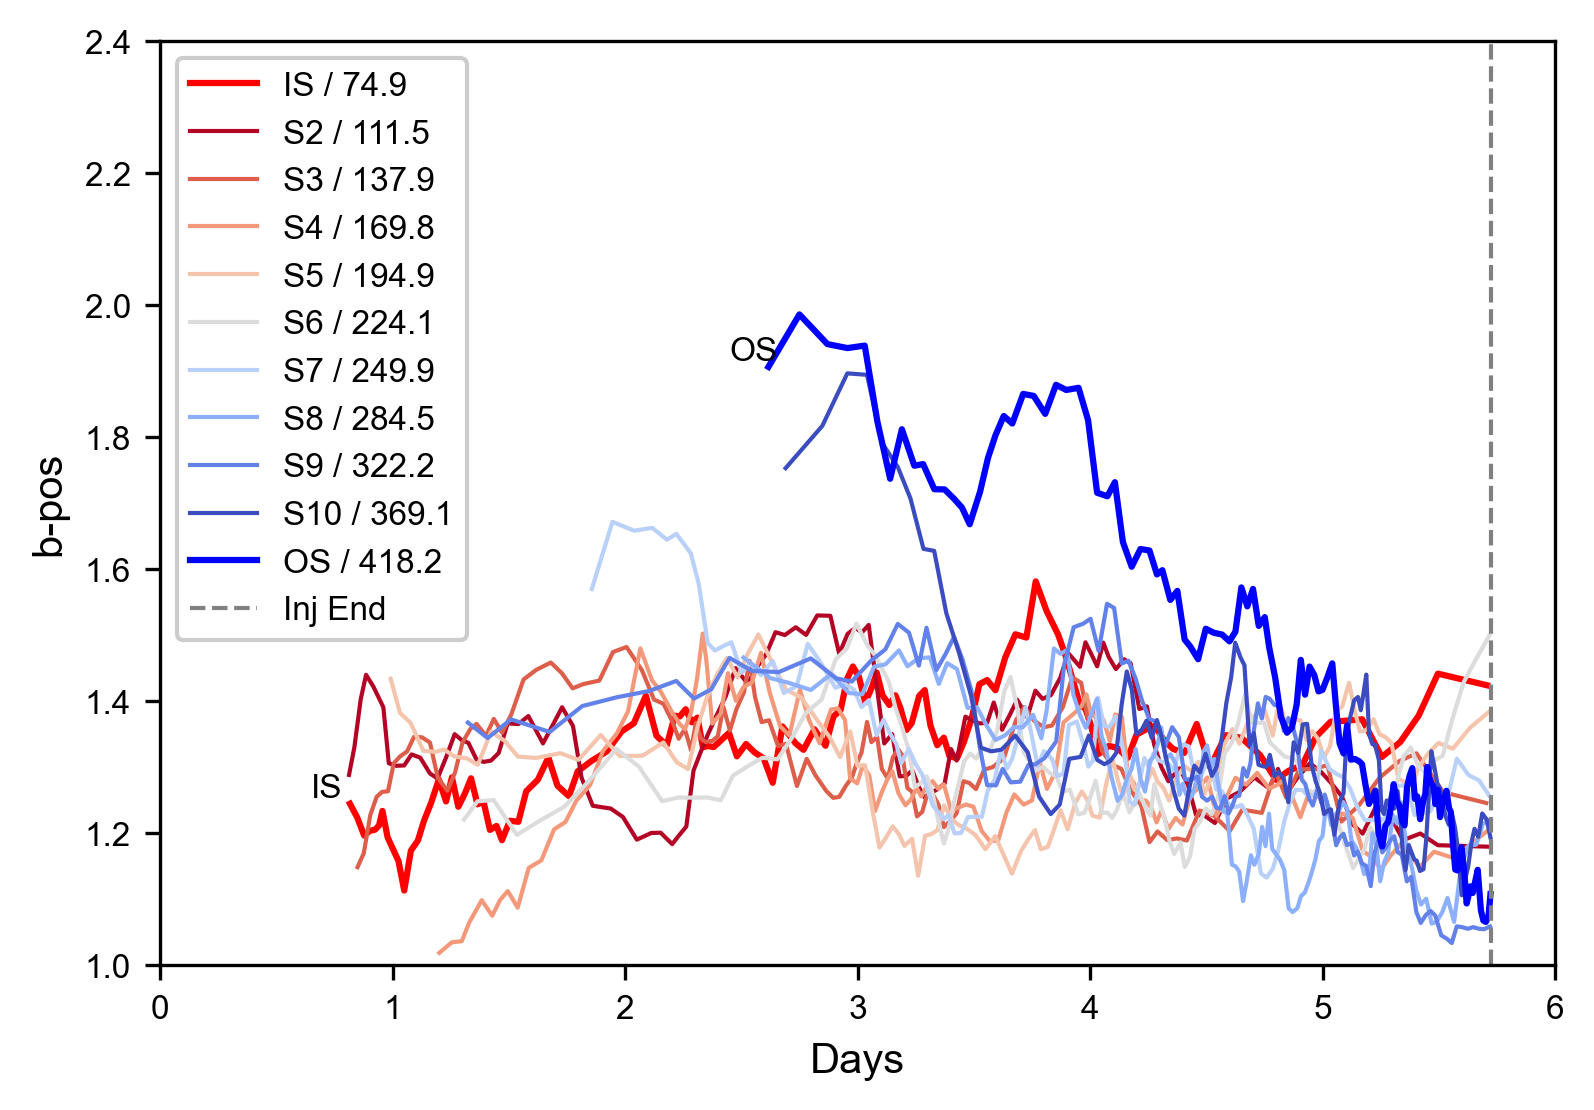

In [46]:
from datetime import timedelta
fig, ax = plt.subplots(figsize=(6,4),dpi=300)
plt.rcParams['font.family'] = 'Arial'
#ax2 = ax.twinx()
#fig.suptitle("Basel 2006 Spatiotemporal b-positive",fontsize=20)
#first plot
#ax = fig.add_subplot(gs[0])
colors1 = [
    "#FF0000",  # Red
    "#FF3333",  # Red
    "#FFCCCB",  # Light red
    "#FF9999",  # Lighter red
    "#FF6666",  # Soft red
    "#660066",  # Purple
    "#330099",  # Blue-purple
    "#0000FF",  # Blue
    "#000066"   # Dark blue
]

ax.plot(dtr[0],bpr[0],linewidth=1.5,label="IS"+" / "+f"{float(rDmaxRad[0]):.1f}",color='r')
ax.text((dtr[0][0] - 4.0/24), bpr[0][0]+0.01, "IS", color='k',fontsize=8)
for i in range(1,10):
    ax.plot(dtr[i],bpr[i],linewidth=1,label="S"+str(i+1)+" / "+f"{float(rDmaxRad[i]):.1f}",color=colors2[i-1])
    #if i%2==0:
        #ax.text(dtr[i][0] - np.timedelta64(timedelta(hours=4)), bpos[i][0]+0.01, "S"+str(i+1), color='k',fontsize=13)
"""
ax.plot(tStamp,bValT,linewidth=1,label='background bv', color ="silver")
ax.plot(tStamp,bpValT,linewidth=1,label='background bp', color ="darkgray")
ax.scatter(dtr[i], br[i], label = 'b-val', color = 'mediumslateblue',s=3)
ax.fill_between(dtr[i], np.subtract(br[i],stdr[i]), np.add(br[i],stdr[i]), alpha = 0.3, color = 'mediumslateblue')


ax.scatter(dtr[i], bpr[i],label = 'b-pos', color = 'red',s=3)
ax.vlines(x = magMT,ymin=0.8,ymax=2.0,colors = 'black',label = 'Mx 3.1')
ax.fill_between(dtr[i], np.subtract(bpr[i],stdpr[i]), np.add(bpr[i],stdpr[i]), alpha = 0.3, color = 'lightcoral')
ax2.scatter(mxdr[i],mxmr[i],label="Max Mw",color='black')
ax2.set_ylabel('Mw',size=16)
"""

ax.plot(dtr[-1],bpr[-1],linewidth=1.5,label="OS"+" / "+ f"{float(rDmaxRad[-1]):.1f}",color='b')
ax.text(dtr[-1][0] - 4.0/24, bpr[-1][0]+0.01, "OS", color='k',fontsize=8)
#ax.axvline((datetime(2006, 12, 8, 16, 48, 39)-stDat).total_seconds()/86400.0,color='black',linestyle='--',linewidth=1,label='Sequence Max')
ax.axvline(injEnd,color='gray',linestyle='--',linewidth=1,label='Inj End')
ax.set_ylim([1,2.4])
ax.set_xlim(0,6)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax.set_ylabel(r'b-pos', fontsize =10)
ax.set_xlabel('Days',fontsize=10)
#fig.autofmt_xdate()
plt.legend(loc = 'upper left',fontsize=8,framealpha=1)
plt.show()
#fig.savefig(r"D:\Yihe\Manuscripting\basel shell fig.png",bbox_inches='tight', pad_inches=0.05)
fig.savefig(r"D:\Yihe\Manuscripting\Basel Figures\basel shell fig.png",bbox_inches='tight', pad_inches=0.05)

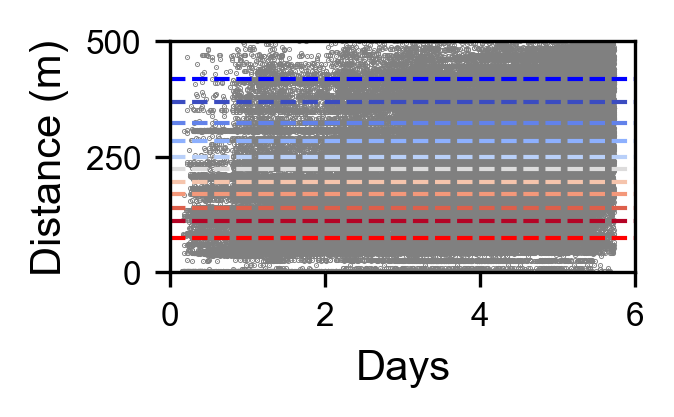

In [47]:


fig, ax1 = plt.subplots(figsize=(2,1),dpi=300)
plt.rcParams['font.family'] = 'Arial'

plt.scatter(hDT,dist,c='gray',s=0.05)
#plt.title("Schematic Seismicity Fronts Based Off SSFS 1993",size=15)
plt.xlabel("Days",fontsize=10)
plt.ylabel("Distance (m)",fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlim(0,6)
plt.ylim(0,500)
# f"{rDmax[]:.2f}"
plt.hlines(rDmaxRad[0],0,20,colors='r',linewidth=1,linestyles='--',label="IS / "+ f"{float(rDmax[0]):.1f}")
for i in range(1,10):
    plt.hlines(rDmaxRad[i],0,20,colors=colors2[i-1],linewidth=1,linestyles='--',label="S"+str(i)+" / "+f"{float(rDmax[i]):.1f}")
plt.hlines(rDmaxRad[-1],0,20,colors='b',linewidth=1,linestyles='--',label="OS /"+f"{float(rDmax[-1]):.1f}")
#fig.legend(loc='upper right',fontsize=6)
plt.show()
#fig.savefig(r"D:\Yihe\Manuscripting\seismicity front fig.png",bbox_inches='tight', pad_inches=0.05)
fig.savefig(r"D:\Yihe\Manuscripting\Basel Figures\basel shell inset.png",bbox_inches='tight', pad_inches=0.05)